In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def strToList(data):
    converted_data = {}
    for key, value in data.items():
        try:
            converted_list = eval(value)
            if isinstance(converted_list, list):
                converted_data[key] = converted_list
            else:
                print(f"Invalid list format for {key}")
        except Exception as e:
            print(f"Error converting {key}: {e}")
    return converted_data

def norm(l):
    a = np.array(l)
    a = a/np.sum(a)
    return a

def index90(a):
    cumsum = np.cumsum(a)
    perc = cumsum/cumsum[9]
    return np.where(perc>=0.9)[0][0]

In [105]:
lstm = pd.read_csv('LSTM.csv')
cnn = pd.read_csv('CNN.csv')
yolo = pd.read_csv('YOLO.csv')
cnnS = pd.read_csv('CNN_settings.csv')
yolo.head(16)

,Unnamed: 0,Window_size,Torelax,Gyro,Filter,magnitude,justHand,F1s,F1e,MAE_S,ratio_S,hist_S,count_S,MAE_E,ratio_E,hist_E,count_E,total_steps
0,0,200,False,True,True,True,True,0.929769,0.0,4.257721,0.932924,"[181.0, 348.0, 265.0, 282.0, 206.0, 146.0, 117...",1975,0,0,0,0,2117
1,1,200,False,True,True,False,True,0.925782,0.0,11.857142,0.009920,"[0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, ...",21,0,0,0,0,2117
2,2,200,False,False,True,True,True,0.932149,0.0,5.172814,0.691545,"[100.0, 208.0, 184.0, 153.0, 135.0, 136.0, 86....",1464,0,0,0,0,2117
3,3,200,False,False,True,False,True,0.928319,0.0,5.443963,0.653283,"[77.0, 191.0, 167.0, 161.0, 125.0, 104.0, 93.0...",1383,0,0,0,0,2117
4,4,200,False,True,True,True,False,0.937345,0.0,3.135707,0.792749,"[989.0, 1819.0, 1279.0, 764.0, 467.0, 275.0, 1...",6713,0,0,0,0,8468
5,5,200,False,True,True,False,False,0.935009,0.0,3.055570,0.894662,"[1007.0, 1899.0, 1533.0, 974.0, 608.0, 404.0, ...",7576,0,0,0,0,8468
6,6,200,False,False,True,True,False,0.931977,0.0,3.295349,0.101559,"[95.0, 176.0, 171.0, 123.0, 91.0, 58.0, 36.0, ...",860,0,0,0,0,8468
7,7,200,False,False,True,False,False,0.931382,0.0,3.225525,0.230397,"[288.0, 469.0, 370.0, 209.0, 151.0, 113.0, 87....",1951,0,0,0,0,8468


In [83]:
lstm.sort_values(by=['ratio_S'])

,Unnamed: 0,Window_size,Torelax,Gyro,Filter,magnitude,justHand,F1s,F1e,MAE_S,ratio_S,hist_S,count_S,MAE_E,ratio_E,hist_E,count_E,total_steps
5,5,100,False,True,True,True,False,0.902457,0.900728,3.385965,0.013462,"[9.0, 23.0, 22.0, 10.0, 12.0, 9.0, 15.0, 8.0, ...",114,3.427419,0.014643,"[9.0, 24.0, 23.0, 15.0, 16.0, 10.0, 8.0, 9.0, ...",124,8468
7,7,200,False,True,True,True,False,0.890336,0.888928,2.578313,0.029405,"[25.0, 70.0, 57.0, 36.0, 18.0, 14.0, 6.0, 14.0...",249,2.516000,0.029523,"[31.0, 70.0, 52.0, 38.0, 18.0, 12.0, 10.0, 7.0...",250,8468
13,13,100,False,False,True,True,False,0.881647,0.879340,2.858006,0.039088,"[25.0, 77.0, 66.0, 63.0, 34.0, 25.0, 19.0, 9.0...",331,2.934132,0.039443,"[25.0, 78.0, 62.0, 59.0, 40.0, 28.0, 15.0, 13....",334,8468
15,15,200,False,False,True,True,False,0.872594,0.872090,2.634892,0.065659,"[59.0, 138.0, 117.0, 83.0, 68.0, 34.0, 24.0, 1...",556,2.636528,0.065305,"[64.0, 139.0, 107.0, 81.0, 74.0, 29.0, 24.0, 1...",553,8468
11,11,200,False,False,True,True,True,0.808289,0.805938,2.460526,0.682097,"[187.0, 358.0, 343.0, 205.0, 136.0, 84.0, 55.0...",1444,2.480692,0.709495,"[194.0, 364.0, 343.0, 229.0, 149.0, 91.0, 51.0...",1502,2117
9,9,100,False,False,True,True,True,0.835852,0.833286,2.425828,0.713274,"[226.0, 391.0, 315.0, 207.0, 144.0, 88.0, 48.0...",1510,2.437542,0.699575,"[224.0, 383.0, 304.0, 211.0, 128.0, 87.0, 50.0...",1481,2117
1,1,100,False,True,True,True,True,0.864493,0.862681,2.308871,0.740198,"[219.0, 469.0, 348.0, 196.0, 113.0, 86.0, 46.0...",1567,2.335664,0.743033,"[222.0, 462.0, 346.0, 199.0, 117.0, 81.0, 52.0...",1573,2117
8,8,100,True,False,True,True,True,0.858313,0.856559,2.348434,0.844591,"[234.0, 499.0, 387.0, 262.0, 181.0, 83.0, 56.0...",1788,2.359234,0.838923,"[250.0, 477.0, 392.0, 251.0, 166.0, 95.0, 49.0...",1776,2117
0,0,100,True,True,True,True,True,0.875258,0.874808,2.064359,0.873406,"[322.0, 555.0, 415.0, 250.0, 126.0, 59.0, 42.0...",1849,2.077670,0.875768,"[324.0, 540.0, 438.0, 243.0, 120.0, 59.0, 43.0...",1854,2117
3,3,200,False,True,True,True,True,0.842758,0.841906,1.890484,0.888521,"[375.0, 610.0, 417.0, 201.0, 109.0, 56.0, 48.0...",1881,1.902348,0.885215,"[358.0, 609.0, 443.0, 188.0, 112.0, 55.0, 37.0...",1874,2117


In [7]:
#print(lstm['hist_S'])
lstm_append = cnnS.drop(['hist_S','hist_E'],axis=1)
a = lstm_append[0:6].T#.head(16
b = lstm_append[6:16].T


In [8]:
print(b.to_latex(index=True,float_format="{:.2f}".format))

\begin{tabular}{lllllllllll}
\toprule
{} &     6  &     7  &     8  &     9  &     10 &     11 &     12 &     13 &     14 &     15 \\
\midrule
Unnamed: 0  &      6 &      7 &      8 &      9 &     10 &     11 &     12 &     13 &     14 &     15 \\
Window\_size &    100 &    200 &    100 &    200 &    100 &    200 &    100 &    200 &    100 &    200 \\
Torelax     &   True &   True &   True &   True &   True &   True &   True &   True &   True &   True \\
Gyro        &   True &   True &  False &  False &  False &  False &  False &  False &  False &  False \\
Filter      &  False &  False &   True &   True &  False &  False &   True &   True &  False &  False \\
magnitude   &  False &  False &   True &   True &   True &   True &  False &  False &  False &  False \\
justHand    &   True &   True &   True &   True &   True &   True &   True &   True &   True &   True \\
F1s         &   0.89 &   0.88 &   0.85 &   0.86 &   0.87 &   0.88 &   0.85 &   0.86 &   0.85 &   0.87 \\
F1e         &   

C:\Users\K54738\AppData\Local\Temp\ipykernel_9312\1829497912.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(b.to_latex(index=True,float_format="{:.2f}".format))


C:\Users\K54738\AppData\Local\Temp\ipykernel_9312\371243822.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importances, x=X.columns, palette="viridis")


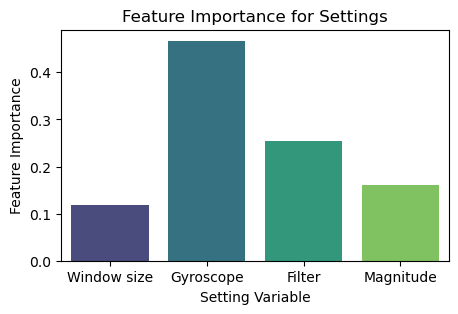

In [9]:
from sklearn.ensemble import RandomForestRegressor 
import seaborn as sns
data = cnnS[['Window_size','Gyro','Filter','magnitude','ratio_S','MAE_S','ratio_E','MAE_E']]

df = pd.DataFrame(data)

# Split data into features and target
X = df.drop(['ratio_S','MAE_S','ratio_E','MAE_E'], axis=1)
y = df[['ratio_S','MAE_S','ratio_E','MAE_E']]

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a bar chart for feature importances
plt.figure(figsize=(5, 3))
sns.barplot(y=feature_importances, x=X.columns, palette="viridis")
plt.xticks(range(4), ['Window size','Gyroscope','Filter','Magnitude'])

# Add labels and a title
plt.ylabel("Feature Importance")
plt.xlabel("Setting Variable")
plt.title("Feature Importance for Settings")
plt.savefig('Setting variable.pdf',bbox_inches='tight')
# Show the plot
plt.show()

In [ ]:
#0,10,0,10,0,2,0,2
#4,14,4,14,4,6,4,6

In [85]:
lstm_hist_s_100 = strToList(lstm['hist_S'])[4]
lstm_hist_s_200 = strToList(lstm['hist_S'])[6]
lstm_hist_e_100 = strToList(lstm['hist_E'])[4]
lstm_hist_e_200 = strToList(lstm['hist_E'])[6]
lstm_hist_s_100,lstm_hist_e_100,lstm_hist_s_200,lstm_hist_e_200

([1585.0, 2611.0, 1805.0, 921.0, 449.0, 220.0, 145.0, 95.0, 55.0, 62.0],
 [1574.0, 2616.0, 1790.0, 937.0, 438.0, 228.0, 154.0, 85.0, 66.0, 60.0],
 [1715.0, 2669.0, 1771.0, 915.0, 433.0, 200.0, 136.0, 86.0, 54.0, 50.0],
 [1710.0, 2629.0, 1763.0, 932.0, 407.0, 207.0, 130.0, 82.0, 60.0, 53.0])

In [86]:
cnn_hist_s_100 = strToList(cnn['hist_S'])[4]
cnn_hist_s_200 = strToList(cnn['hist_S'])[6]
cnn_hist_e_100 = strToList(cnn['hist_E'])[4]
cnn_hist_e_200 = strToList(cnn['hist_E'])[6]
cnn_hist_s_100,cnn_hist_s_200,cnn_hist_e_100,cnn_hist_e_200

([1709.0, 2855.0, 1808.0, 856.0, 362.0, 174.0, 101.0, 68.0, 51.0, 35.0],
 [1613.0, 3013.0, 1770.0, 794.0, 400.0, 213.0, 115.0, 88.0, 46.0, 39.0],
 [1652.0, 2809.0, 1782.0, 861.0, 352.0, 182.0, 106.0, 60.0, 59.0, 38.0],
 [1571.0, 2962.0, 1751.0, 860.0, 416.0, 182.0, 126.0, 83.0, 55.0, 45.0])

In [107]:
yolo.columns

Index(['Unnamed: 0', 'Window_size', 'Torelax', 'Gyro', 'Filter', 'magnitude',
       'justHand', 'F1s', 'F1e', 'MAE_S', 'ratio_S', 'hist_S', 'count_S',
       'MAE_E', 'ratio_E', 'hist_E', 'count_E', 'total_steps'],
      dtype='object')

In [109]:
yolo_hist_s_200C = strToList(yolo['hist_S'])[4]
yolo_hist_s_200H = strToList(yolo['hist_S'])[5]

(array([0.17475728, 0.46601942, 0.70226537, 0.83333333, 0.89805825,
        0.92988134, 0.95307443, 0.97464941, 0.99029126, 1.        ]),
 array([ 324.,  864., 1302., 1545., 1665., 1724., 1767., 1807., 1836.,
        1854.]),
 5)

In [113]:
def pltSE(s,e,save,name):
    plt.bar(np.arange(len(s)),norm(s),color='blue',width=0.4,align='edge')
    #plt.bar(np.arange(len(e))+0.2,norm(e),color='navy',width=0.4,align='edge')
    plt.axvline(index90(s), color='red', linestyle='--', linewidth=2, label='90th Percentile')
    #plt.axvline(index90(e), color='darkred', linestyle='-.', linewidth=2, label='90th Percentile')
    #plt.legend(['90% Start','90% End','Start','End'])
    plt.xlabel('Absolute Error')
    plt.tick_params(labelsize=13)
    #plt.ylabel('Frequency')
    if save==True:
        plt.savefig(name)
    

def pltS(s,save,name):
    plt.bar(np.arange(len(s)),norm(s),color='blue',width=0.4,align='edge')
    plt.axvline(index90(s), color='red', linestyle='--', linewidth=2, label='90th Percentile')
    #plt.legend(['90% Steps','Steps',])
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    if save==True:
        plt.savefig(name)
    

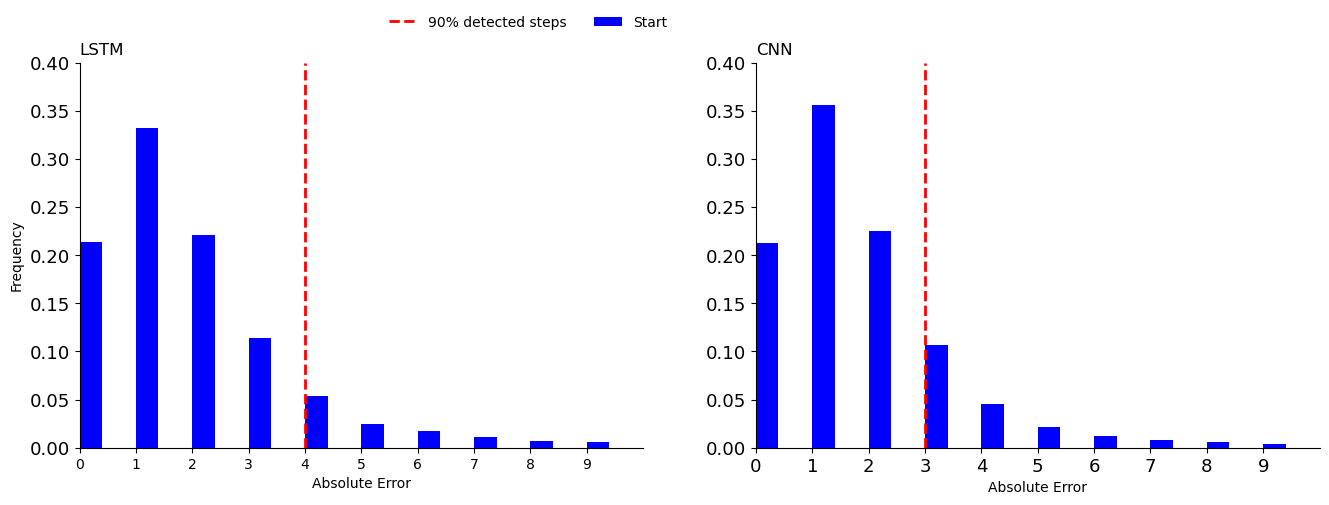

In [120]:
plt.figure(figsize=(16,5))
plt.tight_layout()

plt.subplot(1,2,1)
plt.axis([0,10,0,0.4])
#pltSE(lstm_hist_s_200,lstm_hist_e_200,False,'lstm200')
pltS(lstm_hist_s_200,False,'lstm200')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Frequency')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize=13)
plt.title('LSTM', loc='left')
plt.xticks([0,1,2,3,4,5,6,7,8,9])

plt.subplot(1,2,2)
plt.axis([0,10,0,0.4])
pltSE(cnn_hist_s_100,cnn_hist_e_100,False,'lstm200')

plt.figlegend(['90% detected steps','Start',],loc='upper right', bbox_to_anchor=(0.5, 1.00),ncol=4,frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize=13)
plt.xticks([0,1,2,3,4,5,6,7,8,9])

plt.title('CNN', loc='left')
plt.savefig('PRE_LSTM_CNN_combinedS.pdf',bbox_inches='tight')
plt.show()

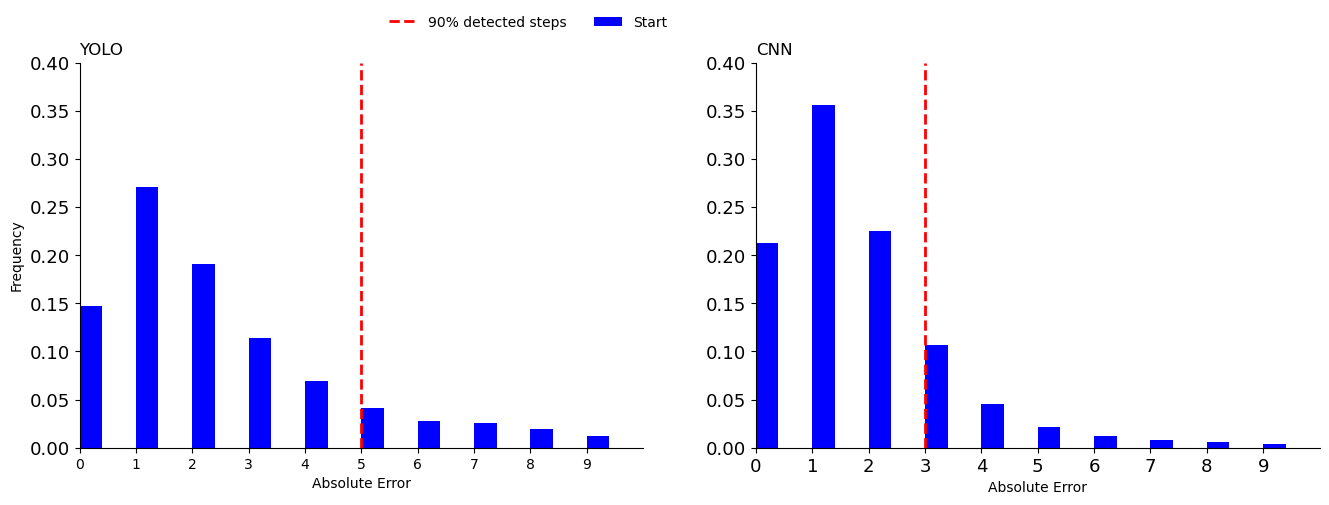

In [116]:
plt.figure(figsize=(16,5))
plt.tight_layout()

plt.subplot(1,2,1)
plt.axis([0,10,0,0.4])
#pltSE(lstm_hist_s_200,lstm_hist_e_200,False,'lstm200')
pltS(yolo_hist_s_200C,False,'lstm200')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylabel('Frequency')
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize=13)
plt.title('YOLO', loc='left')
plt.xticks([0,1,2,3,4,5,6,7,8,9])

plt.subplot(1,2,2)
plt.axis([0,10,0,0.4])
pltSE(cnn_hist_s_100,cnn_hist_e_100,False,'lstm200')

plt.figlegend(['90% detected steps','Start',],loc='upper right', bbox_to_anchor=(0.5, 1.00),ncol=4,frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize=13)
plt.xticks([0,1,2,3,4,5,6,7,8,9])

plt.title('CNN', loc='left')
#plt.savefig('PRE_YOLO_CNN_combined.pdf',bbox_inches='tight')
plt.show()

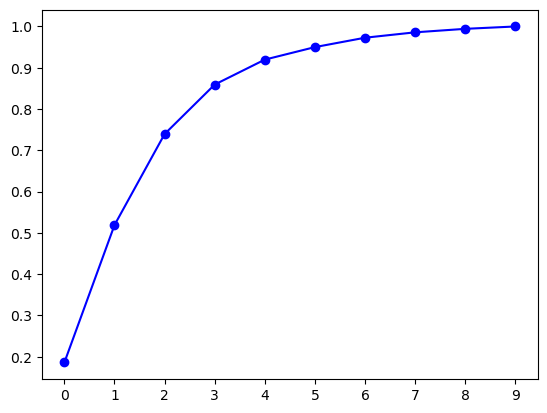

array([0.18620261, 0.33275326, 0.22050963, 0.11982598, 0.06041019,
       0.0303294 , 0.02274705, 0.01305158, 0.00845245, 0.00571784])

In [81]:
import matplotlib.pyplot as plt

# Your data
x_values = range(0,len(lstm_hist_s_200))
y_values = norm(lstm_hist_s_200)

# Calculate the cumulative sum
cumulative_sum = [sum(y_values[:i + 1]) for i in range(len(y_values))]

# Plot the cumulative sum line
plt.plot(x_values, cumulative_sum, marker='o', linestyle='-', color='b')
plt.xticks([0,1,2,3,4,5,6,7,8,9])

# Show the plot
plt.show()
norm(lstm_hist_s_200)

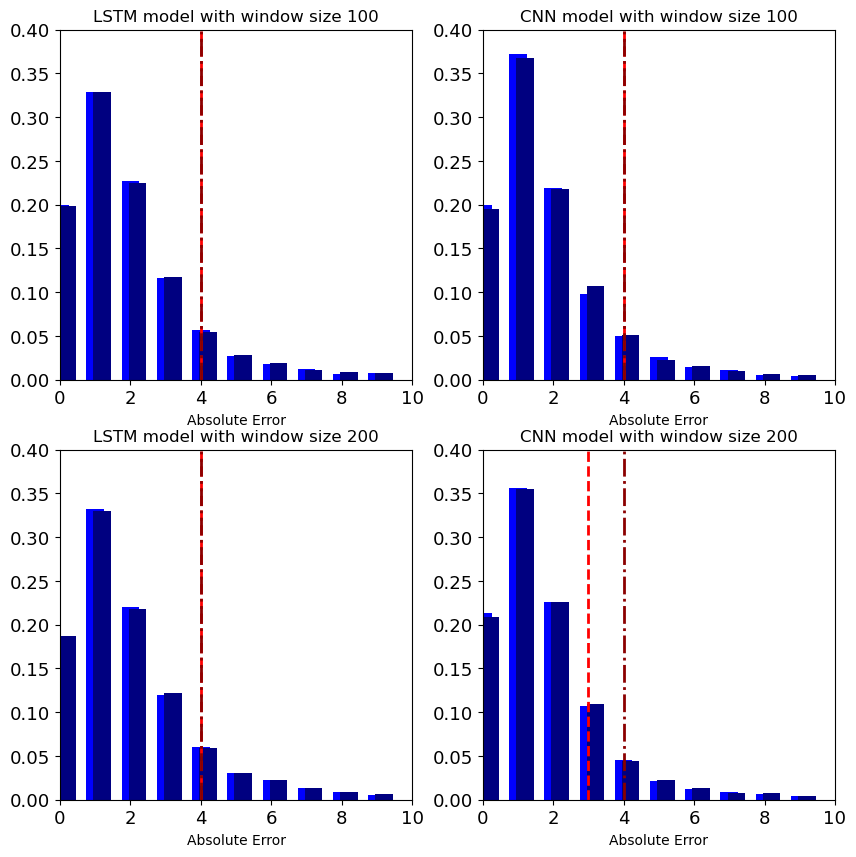

In [55]:
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.subplot(2,2,1)
plt.axis([0,10,0,0.4])
pltSE(lstm_hist_s_100,lstm_hist_e_100,False,'lstm100')
plt.title('LSTM model with window size 100')
plt.subplot(2,2,3)
plt.axis([0,10,0,0.4])
pltSE(lstm_hist_s_200,lstm_hist_e_200,False,'lstm200')
plt.title('LSTM model with window size 200')
plt.subplot(2,2,2)
plt.axis([0,10,0,0.4])
pltSE(cnn_hist_s_200,cnn_hist_e_200,False,'lstm200')
plt.title('CNN model with window size 100')
plt.subplot(2,2,4)
plt.axis([0,10,0,0.4])
pltSE(cnn_hist_s_100,cnn_hist_e_100,False,'lstm200')
plt.title('CNN model with window size 200')
plt.savefig('LSTM_CNN_combined.pdf',bbox_inches='tight')
plt.show()

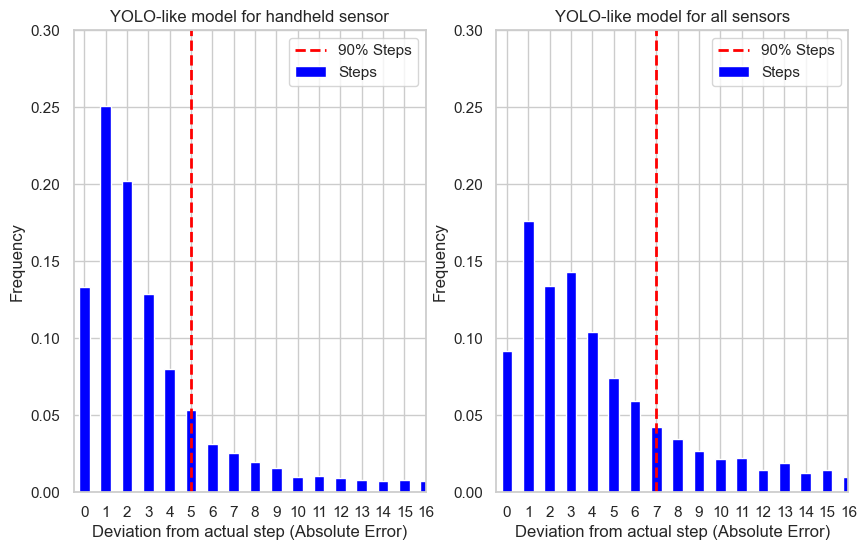

In [166]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.axis([-0.5,16,0,0.3])
pltS(yolo_hist_s_200H,False,'lstm200')
plt.xticks(range(17), range(17))
plt.title('YOLO-like model for handheld sensor')
plt.subplot(1,2,2)
plt.axis([-0.5,16,0,0.3])
pltS(yolo_hist_s_200C,False,'lstm200')
plt.xticks(range(17), range(17))

plt.title('YOLO-like model for all sensors')
plt.savefig('YOLO_combined.pdf',bbox_inches='tight')
plt.show()

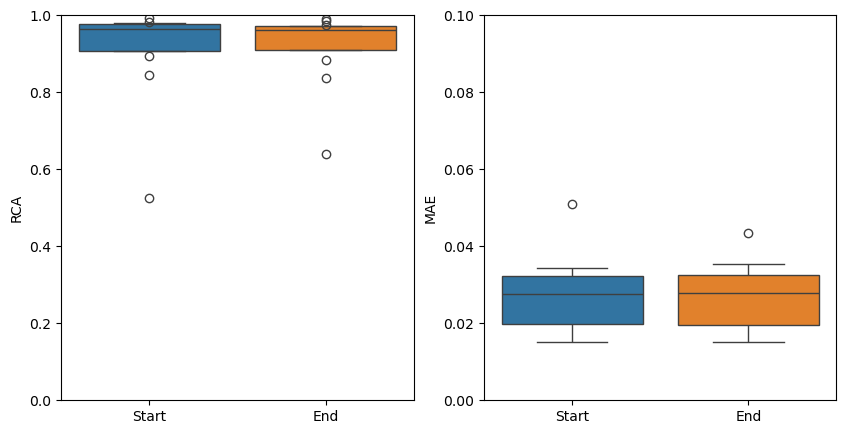

In [42]:
roboust = pd.read_csv('CNN_FOLD1.csv')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
r = sns.boxplot(data=roboust[['ratio_S','ratio_E']],whis=0.05)
plt.ylim([0,1])
r.set_xticks(range(2))
r.set_xticklabels(['Start','End'])
plt.ylabel('RCA')
plt.subplot(1,2,2)
m = sns.boxplot(data=roboust[['MAE_S','MAE_E']]/80,whis=0.5)
plt.ylim([0,0.1])
m.set_xticks(range(2))
m.set_xticklabels(['Start','End'])
plt.ylabel('MAE')
#plt.savefig('CNN_robust.pdf',bbox_inches='tight')
plt.show()

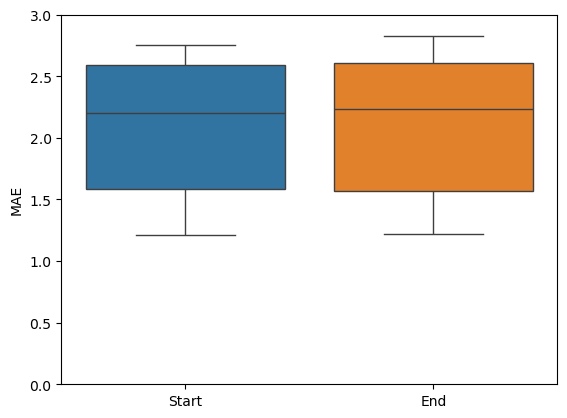

In [31]:

plt.show()

In [68]:
roboust = pd.read_csv('CNN_FOLD1.csv')
roboust.head(17)

,Unnamed: 0,Window_size,Torelax,Gyro,Filter,magnitude,justHand,F1s,F1e,MAE_S,ratio_S,hist_S,count_S,MAE_E,ratio_E,hist_E,count_E,total_steps,ID
0,0,200,True,True,True,True,True,0.892649,0.891266,2.394402,0.950423,"[92, 227, 189, 124, 61, 29, 21, 13, 8, 7, 3, 5...",786,2.397946,0.941959,"[92, 223, 197, 122, 60, 26, 13, 14, 5, 3, 7, 8...",779,827,['Bibin']
1,1,200,True,True,True,True,True,0.931468,0.930299,1.492908,0.979167,"[146, 215, 118, 43, 14, 10, 4, 4, 1, 4, 5]",564,1.540925,0.975694,"[141, 209, 120, 47, 16, 10, 5, 2, 4, 2, 1, 3, ...",562,576,['phillip']
2,2,200,True,True,True,True,True,0.839842,0.835672,2.579030,0.894958,"[108, 195, 124, 74, 33, 26, 13, 13, 10, 10, 11...",639,2.591125,0.883754,"[90, 198, 142, 65, 39, 20, 17, 9, 7, 14, 7, 7,...",631,714,['Viony Tengguna']
3,3,200,True,True,True,True,True,0.903951,0.901897,2.622951,0.982430,"[60, 167, 166, 106, 73, 33, 23, 20, 11, 3, 6, 3]",671,2.647845,0.985359,"[64, 163, 149, 120, 75, 42, 22, 13, 11, 6, 5, ...",673,683,['Mahesh']
4,4,200,True,True,True,True,True,0.754969,0.782652,4.070175,0.526154,"[27, 45, 52, 43, 47, 38, 25, 18, 15, 10, 7, 7,...",342,3.467470,0.638462,"[50, 79, 67, 49, 53, 32, 23, 16, 13, 12, 6, 5,...",415,650,['Vincent Wahyudi']
5,5,200,True,True,True,True,True,0.890465,0.888156,2.750000,0.911877,"[63, 129, 81, 58, 51, 33, 21, 13, 7, 9, 4, 4, ...",476,2.829167,0.919540,"[74, 127, 78, 54, 44, 27, 26, 17, 12, 8, 3, 1,...",480,522,['Phuoc Nguyen Pham']
6,6,200,True,True,True,True,True,0.934335,0.935077,1.209016,0.992677,"[413, 475, 187, 77, 26, 14, 7, 9, 4, 4, 2, 2]",1220,1.220214,0.990236,"[419, 454, 189, 87, 28, 15, 7, 7, 2, 4, 1, 2, ...",1217,1229,['markus']
7,7,200,True,True,True,True,True,0.921674,0.919221,2.098833,0.957526,"[244, 391, 278, 168, 64, 48, 24, 20, 17, 12, 5...",1285,2.214174,0.956781,"[213, 390, 299, 146, 83, 45, 26, 33, 23, 3, 8,...",1284,1342,['Zakriya']
8,8,200,True,True,True,True,True,0.947743,0.947906,1.318476,0.968603,"[389, 509, 195, 59, 23, 19, 8, 9, 3, 5, 2, 3, ...",1234,1.316856,0.968603,"[378, 508, 203, 66, 22, 17, 9, 8, 6, 7, 1, 2, ...",1234,1274,['steffen']
9,9,200,True,True,True,True,True,0.852885,0.851952,2.303748,0.845000,"[147, 177, 61, 21, 18, 11, 14, 10, 11, 6, 3, 8...",507,2.252988,0.836667,"[147, 177, 59, 29, 15, 11, 8, 10, 6, 6, 6, 8, ...",502,600,['Christeena Varghese']


In [76]:
roboust['ratio_S'].min()

0.5261538461538462